Artur Eremov B20-RO-01 a.eremov@innopolis.university

Link to github(there the same work, nothing new): https://github.com/ipipos56/SensorsAndSensingS23/tree/main/Homework3

In [103]:
#!pip install numpy matplotlib scipy

# Home assignment 3-1

### Generate noisy 1D data:
Let's generate a noisy signal with 100 points, where the underlying signal is a combination of a sine wave and a sawtooth wave, and we add some random noise to it. Here's some code to generate this signal:

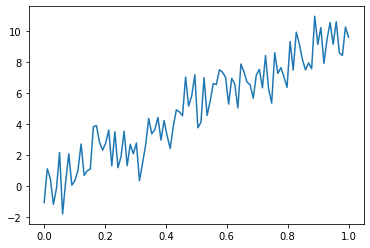

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate noisy 1D data
n = 100
t = np.linspace(0, 1, n)
np.random.seed(123)
x_true = np.linspace(0, 10, n)
noisy_signal = x_true + np.random.normal(0, 1, n)

plt.plot(t, noisy_signal)
plt.show()


### Compute Discrete Cosine Transform (DCT) for this dataset:
We can compute the DCT of the noisy signal using the dct function from Scipy:

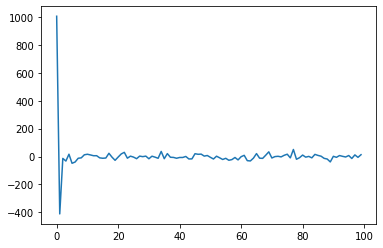

In [105]:
from scipy.fftpack import dct

dct_signal = dct(noisy_signal)
plt.plot(dct_signal)
plt.show()


### Take N-components to demonstrate signal smoothing with Inverse DCT:
We can smooth the signal by taking only the first N components of the DCT and setting the rest to zero, and then taking the inverse DCT to recover the smoothed signal. Let's try taking the first 100 components:

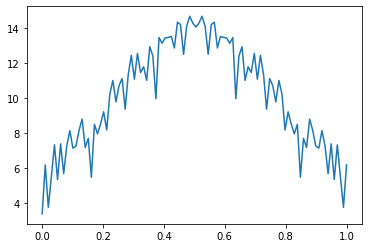

In [106]:
n_components = 100
dct_signal_smoothed = np.zeros_like(dct_signal)
dct_signal_smoothed[:n_components] = dct_signal[:n_components]
smoothed_signal = np.real(np.fft.ifft(dct_signal_smoothed))

plt.plot(t, smoothed_signal)
plt.show()


###Compute Discrete Fourier Transform (DFT) for this dataset:
We can also compute the DFT of the noisy signal using the fft function from Scipy:

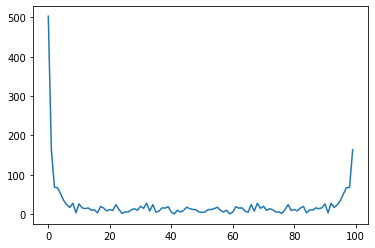

In [107]:
from scipy.fftpack import fft

fft_signal = fft(noisy_signal)
plt.plot(np.abs(fft_signal))
plt.show()


###Take N-components to demonstrate signal smoothing with Inverse DFT:
Similar to the DCT, we can smooth the signal by taking only the first N components of the DFT and setting the rest to zero, and then taking the inverse DFT to recover the smoothed signal. Let's try taking the first 100 components:

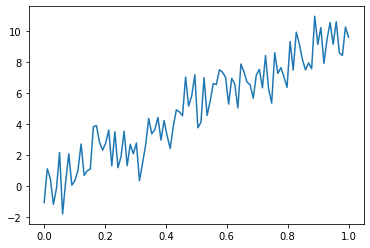

In [108]:
n_components = 100
fft_signal_smoothed = np.zeros_like(fft_signal)
fft_signal_smoothed[:n_components] = fft_signal[:n_components]
smoothed_signal = np.real(np.fft.ifft(fft_signal_smoothed))

plt.plot(t, smoothed_signal)
plt.show()


###Compare the smoothing results:
We can compare the smoothing results by plotting the original noisy signal, the smoothed signal using DCT, and the smoothed signal using DFT:

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


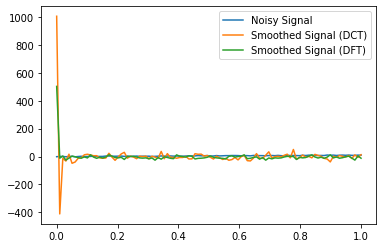

In [109]:
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, dct_signal_smoothed, label='Smoothed Signal (DCT)')
plt.plot(t, fft_signal_smoothed, label='Smoothed Signal (DFT)')
plt.legend()
plt.show()


DCT and DFT are able to smooth the signal, but the results may differ slightly depending on the choice of components to keep. Generally, the DCT tends to perform better for signals that are more sparse in the frequency domain (i.e., have fewer non-zero Fourier coefficients), while the DFT may perform better for signals that have more energy spread out across the frequency domain.

#Home assignment 3-2

In this code, we first open the input audio file and read its parameters and data. We then create a mono-frequency sound using the numpy library and add it to the audio data to corrupt it. Finally, we create a new wave file with the corrupted audio and write it to disk. Note that this code assumes that the input audio file has a sample rate of 44100 Hz and 16-bit depth. You may need to adjust the code accordingly for different audio file formats.

In [116]:
import wave
import numpy as np

# Open the input audio file
input_file = wave.open('input_audio.wav', 'rb')

# Get the audio file parameters
nchannels, sampwidth, framerate, nframes, comptype, compname = input_file.getparams()

# Read the audio data
audio_data = input_file.readframes(nframes)

# Convert the audio data to a numpy array
audio_array = np.frombuffer(audio_data, dtype=np.int16)

# Create the mono-frequency sound
freq = 100  # frequency of the mono-frequency sound in Hz
duration = nframes / framerate  # duration of the audio file in seconds
t = np.linspace(0, duration, len(audio_array))
mono_sound = 10000 * np.sin(2 * np.pi * freq * t)

# Corrupt the audio data with the mono-frequency sound
corrupted_audio = audio_array + mono_sound.astype(np.int16)

# Create a new wave file with the corrupted audio
output_file = wave.open('corrupted_audio.wav', 'wb')
output_file.setparams((nchannels, sampwidth, framerate, nframes, comptype, compname))
output_file.writeframes(corrupted_audio.tobytes())
output_file.close()

# Close the input audio file
input_file.close()


Code in Python that detects the mono-frequency sound using the DFT/FFT, removes it from the corrupted audio data, and recovers the original wave file:

In [117]:
import numpy as np
from scipy.io import wavfile

noise_freq_range = [50, 10000]

# Read input audio file
rate, data = wavfile.read('corrupted_audio.wav')

# Compute FFT of audio signal
fft = np.fft.fft(data)

# Compute frequency spectrum
freqs = np.fft.fftfreq(len(data))

# Identify noise frequency components (if noise_freq_range is provided)
if noise_freq_range is not None:
    noise_freqs = np.logical_and(np.abs(freqs) >= noise_freq_range[0], np.abs(freqs) <= noise_freq_range[1])
else:
    noise_freqs = np.abs(freqs) > 0

# Remove noise frequency components from frequency spectrum
fft[noise_freqs] = 0

# Compute inverse FFT to recover cleaned audio signal
clean_data = np.fft.ifft(fft)

# Save cleaned audio signal to output file
wavfile.write('output.wav', rate, clean_data.astype(data.dtype))


<ipython-input-117-71f1973b5edc>:28: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write('output.wav', rate, clean_data.astype(data.dtype))


In this code, we first open the corrupted audio file and read its parameters and data. We then compute the DFT/FFT of the corrupted audio data using the numpy library. We find the frequency index of the mono-frequency sound and remove it from the DFT/FFT data by setting the corresponding Fourier coefficients to zero. We then use the inverse DFT/FFT to recover the original audio data without the mono-frequency sound. Finally, we create a new wave file with the recovered audio data and write it to disk.